In [5]:
import pandas as pd


df_title_basics = pd.read_csv('../BD_A_IGNORE/title.basics.tsv.gz', compression = 'gzip', sep='\t', on_bad_lines='skip', na_values=['\\N'])
df_title_crew = pd.read_csv('../BD_A_IGNORE/title.crew.tsv.gz', compression = 'gzip', sep='\t', on_bad_lines='skip', na_values=['\\N'])
df_title_ratings = pd.read_csv('../BD_A_IGNORE/title.ratings.tsv.gz', compression = 'gzip', sep='\t', on_bad_lines='skip', na_values=['\\N'])



C:\Users\phili\AppData\Local\Temp\ipykernel_20512\2152287179.py:4: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_title_basics = pd.read_csv('../BD_A_IGNORE/title.basics.tsv.gz', compression = 'gzip', sep='\t', on_bad_lines='skip', na_values=['\\N'])


In [6]:
df_film1 = pd.merge(df_title_basics, df_title_crew, how="outer", on=['tconst'])
df_film_f = pd.merge(df_film1, df_title_ratings, how="outer", on= ['tconst'])

df_film_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11462155 entries, 0 to 11462154
Data columns (total 13 columns):
 #   Column          Dtype  
---  ------          -----  
 0   tconst          object 
 1   titleType       object 
 2   primaryTitle    object 
 3   originalTitle   object 
 4   isAdult         float64
 5   startYear       float64
 6   endYear         float64
 7   runtimeMinutes  object 
 8   genres          object 
 9   directors       object 
 10  writers         object 
 11  averageRating   float64
 12  numVotes        float64
dtypes: float64(5), object(8)
memory usage: 1.1+ GB


In [7]:
df_film_f.sample(6)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,directors,writers,averageRating,numVotes
6593028,tt27390022,tvEpisode,Episode #1.2,Episode #1.2,0.0,2022.0,NaN,NaN,"Drama,Fantasy",NaN,NaN,NaN,NaN
9968512,tt6681988,short,Armes Sensibles,Armes Sensibles,0.0,2004.0,NaN,6.0,"Fantasy,Short",nm1717946,nm1717946,NaN,NaN
2257119,tt12266040,tvEpisode,Episode #1.4589,Episode #1.4589,0.0,NaN,NaN,NaN,Family,nm6593281,"nm11532348,nm11532349",NaN,NaN
7115805,tt2919234,short,I Wouldn't Wish the Eighties on Anyone!,I Wouldn't Wish the Eighties on Anyone!,0.0,2013.0,NaN,19.0,"Comedy,Drama,Horror",nm3284890,nm3284890,7.9,19.0
8624616,tt3765764,tvEpisode,Episode #1.12,Episode #1.12,0.0,2013.0,NaN,NaN,Drama,nm0865422,"nm1636781,nm0865422,nm1636823",7.9,17.0
11239992,tt9439966,tvEpisode,Episode #1.5,Episode #1.5,0.0,2009.0,NaN,NaN,"Action,Adventure,Drama","nm1777491,nm1542079","nm1245286,nm2771158,nm1362937,nm0484073,nm0191...",NaN,NaN


In [8]:
var1 = df_film_f.isnull().sum()

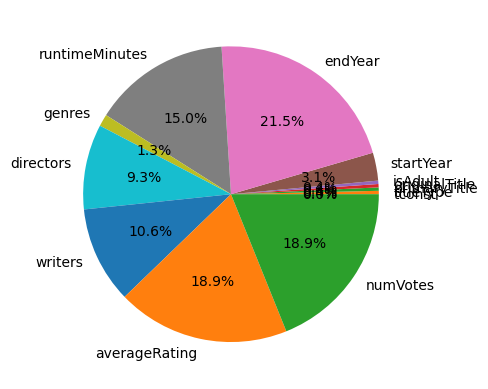

In [9]:
import matplotlib.pyplot as plt 

dfgraphe = pd.DataFrame(df_film_f.isnull().sum(), columns = ['count'])
dfgraphe['category'] = dfgraphe.index
dfgraphe.reset_index
dfgraphe

category = dfgraphe['category'].unique()

fig, ax = plt.subplots()
ax.pie(x= dfgraphe['count'], labels=category, autopct = '%1.1f%%');



In [10]:
dfgraphe.sample(3)

,count,category
tconst,0,tconst
directors,4908097,directors
isAdult,193560,isAdult


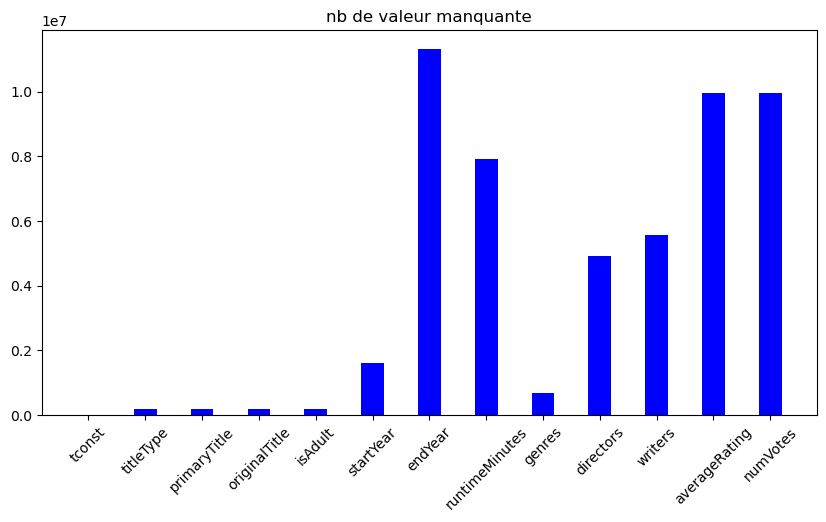

In [11]:
fig = plt.figure(figsize = (10, 5))
plt.bar(x= dfgraphe['category'], height =dfgraphe['count'], color='blue', width= 0.4);
plt.xticks(rotation=45)
plt.title('nb de valeur manquante')
plt.show()

In [12]:

dfgraphe

,count,category
tconst,0,tconst
titleType,193559,titleType
primaryTitle,193578,primaryTitle
originalTitle,193578,originalTitle
isAdult,193560,isAdult
startYear,1610711,startYear
endYear,11329492,endYear
runtimeMinutes,7904344,runtimeMinutes
genres,695119,genres
directors,4908097,directors


In [13]:
df_film_f['tconst'].nunique()

11462155